In [13]:
import xarray as xr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
tas_1k = xr.open_dataset('averaged_time_tas.nc')

In [33]:
df_tas = tas_1k[["tas"]].to_dataframe().reset_index()

In [34]:
df_tas.head()

,time,lat,lon,tas
0,20105.0,85.760587,0.000,232.523300
1,20105.0,85.760587,5.625,232.420792
2,20105.0,85.760587,11.250,232.227554
3,20105.0,85.760587,16.875,231.934937
4,20105.0,85.760587,22.500,231.570984


In [39]:
time_list = df_tas['time'].tolist()
year_list = []

for time in time_list:
    year_list.append(int(time)//10000)

df_tas['year'] = year_list

df_tas['lat_bin'] = (df_tas['lat'] // 20) * 20 

# Group by time and latitude bins, then average variable
df_year_avg = (df_tas.groupby(['year', 'lat_bin'])['tas'].mean().reset_index())

In [40]:
df_year_avg.head()

,year,lat_bin,tas
0,2,-100.0,254.516449
1,2,-80.0,271.004608
2,2,-60.0,281.083923
3,2,-40.0,294.857758
4,2,-20.0,298.475342


<Axes: xlabel='year', ylabel='tas'>

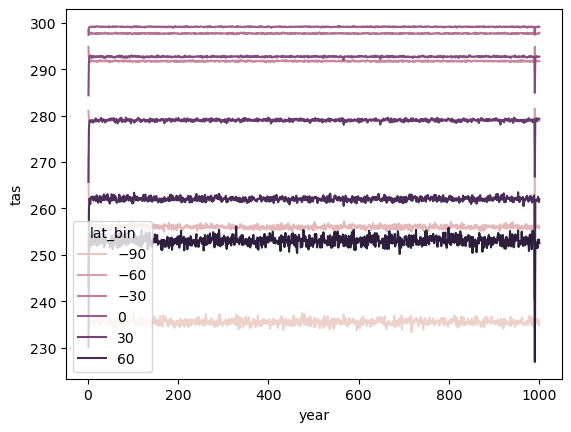

In [42]:
sns.lineplot(x='year',y='tas',data=df_year_avg,hue='lat_bin')

In [44]:
df_year_avg.to_csv('1000_year_tas.csv')